In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')#style change
%matplotlib inline
pd.options.mode.chained_assignment = None #ignore warnings
pd.options.display.float_format = '{:.4f}'.format #display in non-scientific notation

In [2]:
#**LEO these next two cells are for you:
#they should have all the code you need to run independently in your notebook

In [3]:
#LEO: This is for largest initial black percentage in 2010
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")
cens_race['Percent White'] = cens_race["White"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Black'] = cens_race["Black"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent American Indian/Alaska Native'] = cens_race["American Indian and Alask Native"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Asian'] = cens_race["Asian"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Native Hawaiian/Pacific Islander'] = cens_race["Native Hawaiian and Other Pacific Islander"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Other'] = cens_race["Other"].astype(float) / cens_race['Total Population'].astype(float)
race_pct = cens_race[['Census Tract', 'Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other', 'Year']].drop_duplicates()
race_pct.dropna(inplace=True)

cols = ['Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other']
race_in2010 = race_pct[race_pct['Year']==2010]

most_black = cens_race[cens_race['Year']==2010][['Census Tract', 'Percent Black']].sort_values(by='Percent Black',ascending=False).head(15)
most_black = list(most_black['Census Tract'].to_dict().values())
most_black;

In [4]:
#LEO: This is for black pct between 0.4 and 0.6 in 2010
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")
cens_race['Percent White'] = cens_race["White"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Black'] = cens_race["Black"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent American Indian/Alaska Native'] = cens_race["American Indian and Alask Native"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Asian'] = cens_race["Asian"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Native Hawaiian/Pacific Islander'] = cens_race["Native Hawaiian and Other Pacific Islander"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Other'] = cens_race["Other"].astype(float) / cens_race['Total Population'].astype(float)
race_pct = cens_race[['Census Tract', 'Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other', 'Year']].drop_duplicates()
race_pct.dropna(inplace=True)

cols = ['Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other']
race_in2010 = race_pct[race_pct['Year']==2010]

#race_in2010.reset_index(inplace=True)
gent_18 = list(race_in2010[(race_in2010['Percent Black']<.6) & (race_in2010['Percent Black']>.4)]['Census Tract'].to_dict().values())
gent_18;

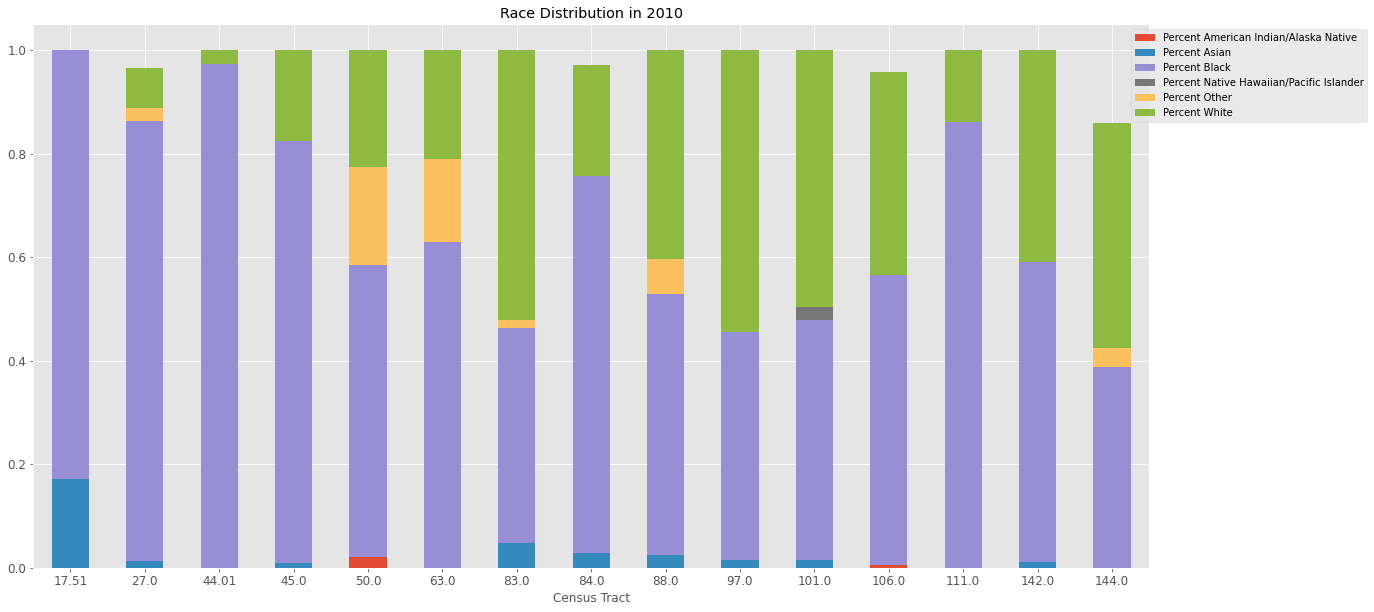

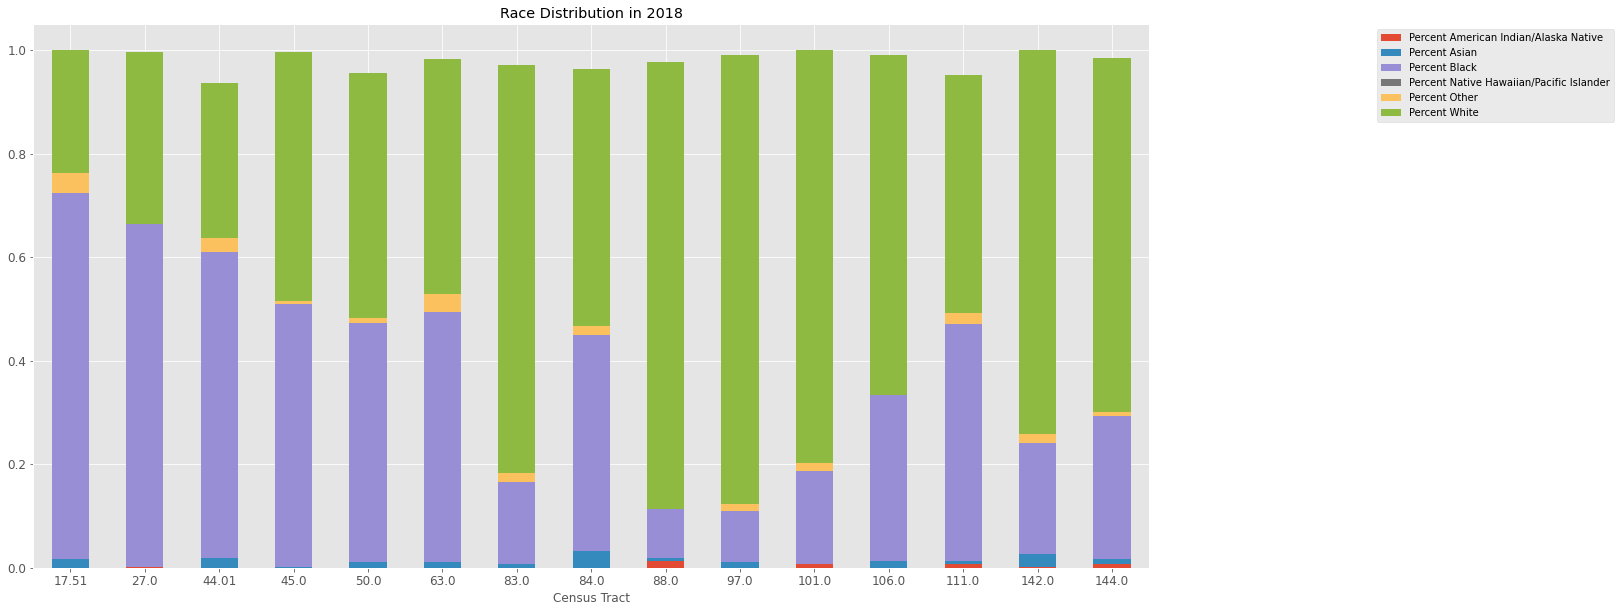

In [5]:
#Changing what I did before to take in census tract data: highest change in white population
cens_income = pd.read_csv("./Data/cleaned_income_data.csv")
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")


cens_race['Percent White'] = cens_race["White"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Black'] = cens_race["Black"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent American Indian/Alaska Native'] = cens_race["American Indian and Alask Native"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Asian'] = cens_race["Asian"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Native Hawaiian/Pacific Islander'] = cens_race["Native Hawaiian and Other Pacific Islander"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Other'] = cens_race["Other"].astype(float) / cens_race['Total Population'].astype(float)
race_pct = cens_race[['Census Tract', 'Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other', 'Year']].drop_duplicates()
race_pct.dropna(inplace=True)


cols = ['Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other']


#Make Datasets in 2010 and 2018 to calculate change:
race_in2010 = race_pct[race_pct['Year']==2010]
race_in2018 = race_pct[race_pct['Year']==2018]

race_in2010.set_index('Census Tract', inplace=True)
race_in2018.set_index('Census Tract', inplace=True)

#Calculate which neighborhoods had the biggest influx of white people between the two time periods:

change_white = race_pct[['Census Tract']].drop_duplicates()
change_white.set_index('Census Tract', inplace=True)

#Subtract most recent data from old data
change_white['Change in White'] = race_in2018['Percent White'] - race_in2010['Percent White']


#Save the 15 census tracts with the highest increase in population of white people
highest_change = list(change_white['Change in White'].sort_values(ascending=False).head(15).astype(str).to_dict().keys())

most_black = cens_race[cens_race['Year']==2010][['Census Tract', 'Percent Black']].sort_values(by='Percent Black',ascending=False).head(15)
risky = list(most_black['Census Tract'].to_dict().values())

#subset_2010 = race_in2010.loc[risky]
#subset_2018 = race_in2018.loc[risky]

#Create subsets for each of the years for comparison
subset_2010 = race_in2010.loc[highest_change]
subset_2018 = race_in2018.loc[highest_change]

#-------------------------------------------Plotting--------------------------------------------

#Create pivot tables and plot


subset_2010.pivot_table(index='Census Tract', values=cols).plot.bar(stacked=True, fontsize='large',
                                        rot=0, figsize=(20,10), title='Race Distribution in 2010'
                                        ).legend(bbox_to_anchor=(1.2, 1))
subset_2018.pivot_table(index='Census Tract', values=cols).plot.bar(stacked=True, fontsize='large',
                                        rot=0, figsize=(20,10), title='Race Distribution in 2018'
                                        ).legend(bbox_to_anchor=(1.2, 1))

['#404753', '#0AA39F', '#E3F8A5', '#468989', '#2A5568', '#77be9c']


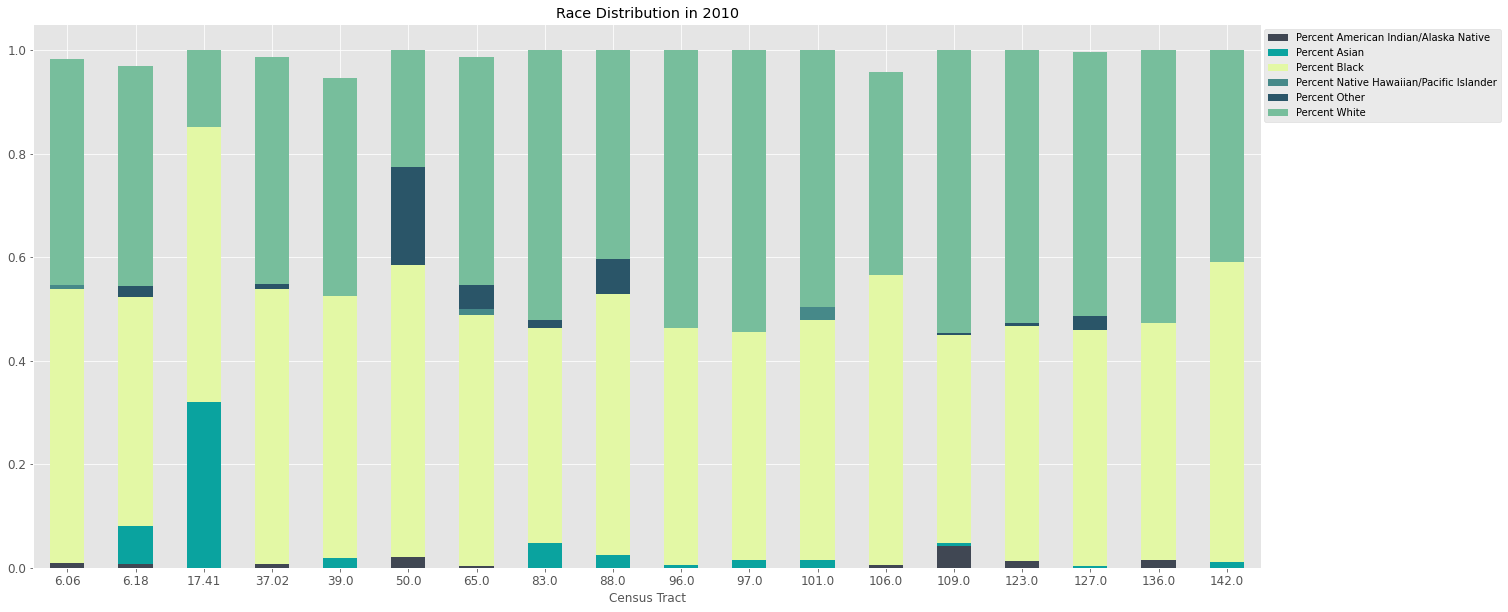

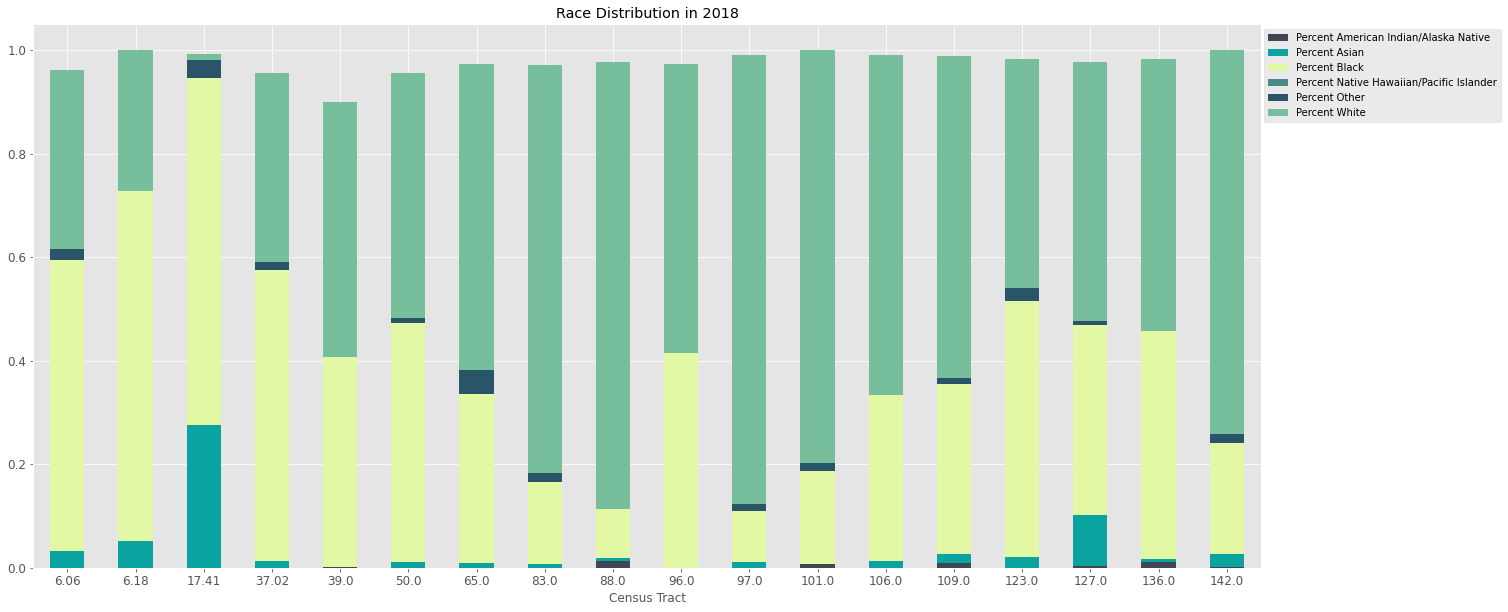

In [6]:
#Changing what I did before to take in census tract data: initial black population between .4 and .6
cens_income = pd.read_csv("./Data/cleaned_income_data.csv")
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")


cens_race['Percent White'] = cens_race["White"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Black'] = cens_race["Black"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent American Indian/Alaska Native'] = cens_race["American Indian and Alask Native"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Asian'] = cens_race["Asian"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Native Hawaiian/Pacific Islander'] = cens_race["Native Hawaiian and Other Pacific Islander"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Other'] = cens_race["Other"].astype(float) / cens_race['Total Population'].astype(float)
race_pct = cens_race[['Census Tract', 'Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other', 'Year']].drop_duplicates()
race_pct.dropna(inplace=True)


cols = ['Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other']

#Make Datasets in 2010 and 2018 to calculate change:
race_in2010 = race_pct[race_pct['Year']==2010]
race_in2018 = race_pct[race_pct['Year']==2018]

race_in2010.set_index('Census Tract', inplace=True)
race_in2018.set_index('Census Tract', inplace=True)

#Create subsets for each of the years for comparison
import random as rand
#theme = ['#468989', '#77be9c', '#E3F8A5', '#404753', '#2A5568', '#0AA39F']
#theme = ['#404753', '#2A5568', '#0AA39F', '#77be9c', '#468989', '#E3F8A5']
#theme = ['#404753', '#2A5568', '#468989', '#0AA39F', '#E3F8A5', '#77be9c']
#theme = ['#0AA39F', '#404753', '#77be9c', '#468989', '#2A5568', '#E3F8A5']
theme=['#0AA39F' ,'#2A5568', '#468989','#77be9c', '#E3F8A5', '#404753' ]
rand.shuffle(theme)
print(theme)

race_in2010.reset_index(inplace=True)
gent_18 = list(race_in2010[(race_in2010['Percent Black']<.6) & (race_in2010['Percent Black']>.4)]['Census Tract'].to_dict().values())
gent_18

race_in2010.set_index('Census Tract', inplace=True)


subset_2010 = race_in2010.loc[gent_18]
subset_2018 = race_in2018.loc[gent_18]

#-------------------------------------------Plotting--------------------------------------------

#Create pivot tables and plot
subset_2010.pivot_table(index='Census Tract', values=cols).plot.bar(stacked=True, color=theme, fontsize='large',
                                        rot=0, figsize=(22,10), title='Race Distribution in 2010'
                                        ).legend(bbox_to_anchor=(1.2, 1))
subset_2018.pivot_table(index='Census Tract', values=cols).plot.bar(stacked=True, color=theme, fontsize='large',
                                        rot=0, figsize=(22,10), title='Race Distribution in 2018'
                                        ).legend(bbox_to_anchor=(1.2, 1))

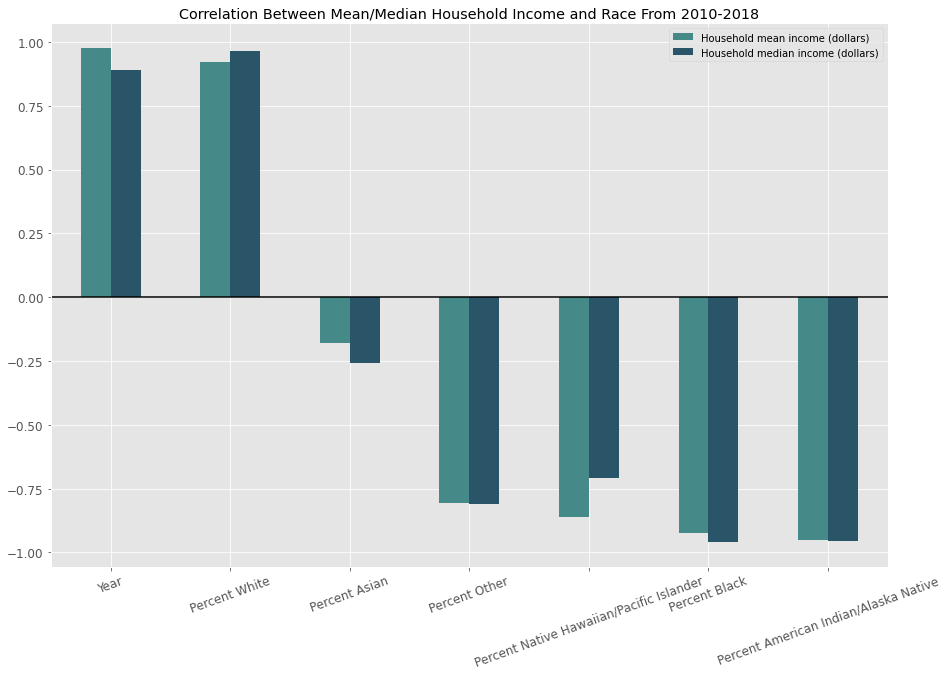

In [7]:
#Converting to census tract data for income correlation

race_forincome = race_pct.drop('Census Tract', axis=1)

cens_income = pd.read_csv("./Data/cleaned_income_data.csv")
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")

mean_df = cens_income[['Household mean income (dollars)', 'Year']].dropna()
median_df = cens_income[['Household median income (dollars)', 'Year']].dropna()

mean_race = mean_df.merge(race_forincome, on='Year').drop_duplicates()
median_race = median_df.merge(race_forincome, on='Year').drop_duplicates()


pv = mean_race.pivot_table(index='Year', values=(cols+['Household mean income (dollars)']), aggfunc=np.mean)
mean_race = pd.DataFrame(pv.to_records())
plotter = mean_race.corr()['Household mean income (dollars)']
plotter.drop('Household mean income (dollars)', inplace=True)

pv2 = median_race.pivot_table(index='Year', values=(cols+['Household median income (dollars)']), aggfunc=np.mean)
median_race = pd.DataFrame(pv2.to_records())
plotter2 = median_race.corr()['Household median income (dollars)']
plotter2.drop('Household median income (dollars)', inplace=True)

order = list(plotter.sort_values(ascending=False).index)
plotter = pd.concat([plotter, plotter2], axis=1)
plotter.reindex(order).plot.bar(
                    title='Correlation Between Mean/Median Household Income and Race From 2010-2018', 
                    figsize=(15,10), fontsize='large', rot=20,color=['#468989','#2A5568']).axhline(y=0, 
                                                                                        color='black')

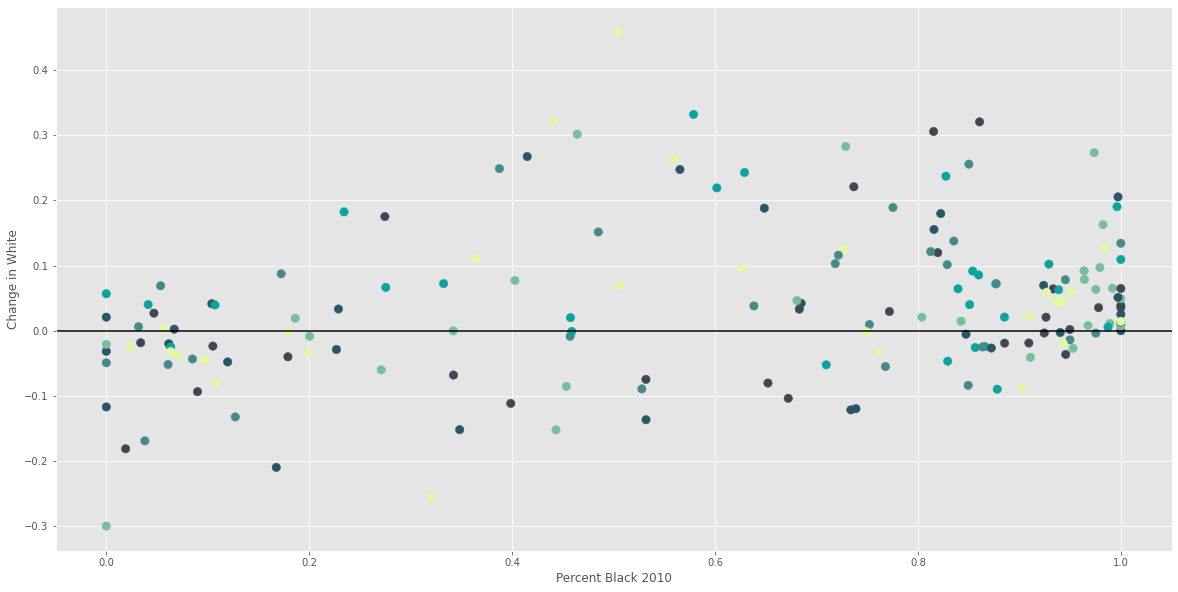

In [8]:
change_white['Percent Black 2010'] = race_in2010['Percent Black']
change_white.plot.scatter(x='Percent Black 2010', y='Change in White', figsize=(20,10), c=theme*29, s=70).axhline(y=0, 
                                                                                        color='black')